Lecture 07
==========

Our setup
---------

Input and desired output:
$$X &= [x_1, ..., x_N] \in \mathbb{R}^{D\times N} \text{- (matrix) N training samples with D features each}\\
Y &= [y_1, ..., y_N] \in \mathbb{R}^{1\times N} \text{- a row vector of desired outputs}$$

$$y=\theta^Tx$$ $$p(y|x)=\mathcal{N}(\mu = \theta^Tx, \sigma^2)$$

$$p(y|x)=\sigma(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$

General algorithm
-----------------

Define a loss function $\rightarrow$ use max likelihood criterion  
Find the minimum of the loss function using gradient based methods:

1.  closed form formula

2.  gradient descent

3.  $2^{nd}$ order (Newton/Quasi-Newton/optimization)

<!-- -->

1.  Loss function & model definition

2.  The loss function selects the best model

3.  it often stems from a probabilistic interpretation

Examples
--------

1.  Predict \# of customers (Poisson distribution)
    $$p(y=k|x) = Poisson(y=k, \lambda=\theta^Tx) = \frac{\lambda^ke^{-\lambda}}{k!}$$
    *Note:* The negative log likelihood is simple  
    $nll = -k log(\lambda) + \lambda = \lambda-k log(\lambda) = \theta^Tx-klog(\theta^Tx)$

2.  $C$-class classification:  
    Score for class i $= s_i = \theta_i^Tx$ (one score per class)  
    Can also compute jointly $S = \bar{\Theta}^TX$ with
    $\bar{\Theta} \in \mathbb{R}^{D \times C}$  
    *Note:* $C = 1$ in linear regression  
    *Q:* How to normalize scores to probabilities?  
    $$p(y=c|S) = softmax_c(S) = \frac{e^{S_c}}{\sum_{i=1}^C e^{S_i}}$$
    $$p(y=y^i|S) = \prod_{c\in C} (\frac{e^{S_c}}{\sum_{i=1}^C e^{S_i}})^{[y^i=c]}$$

Incidentally, $\mathcal{N}$ormal, Bernoulli, Poisson & Softmax all
belong to a family of distributions called the exponential family.

$$p(y|\underbrace{\eta}_\text{natural param}) = \frac{b(y)e^{\eta^T \overbrace{T(y)}^\text{sufficient statistic}}}{e^{a(\eta)}} = b(y)^{\frac{1}{2}e^{\eta^TT(y)}}$$
$a(\eta)$ is a normalization/partition function

1.  Bernoulli $$p(y|\phi) &= \phi^y(1-\phi)^{1-y} = \\
                      &= e^{ylog(\phi)+(1-y)log(1-\phi)} = \\
                      &= e^{ylog(\frac{\phi}{1-\phi})}e^{log(1-\phi)}$$

    Thus: $$\eta &= log(\frac{\phi}{1-\phi})\\
        a(\eta) &= -log(1-\phi) = log(1+e^\eta)\\
        T(y) &= y\\
        b(y) &= 1$$

2.  Gaussian
    $$p(y|\mu) = \frac{1}{\sqrt{2\pi}}e^{\frac{-(y-\mu)^2}{2}} = \underbrace{\frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}y^2)}_b exp(\mu \underbrace{y}_T\underbrace{-\frac{1}{2}\mu^2}_a)$$

    Thus: $$\eta &= \mu\\
        a(\eta) &= \frac{\mu^2}{2}= \frac{\eta^2}{2}\\
        T(y) &= y\\
        b(y) &= \frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}y^2)$$

Typically $y|x \sim Exponential family(\eta=\theta^Tx)$

Losses for regression
---------------------

$l(y, \hat{y}) = (y-\hat{y})^2 \leftarrow$ L2 loss corresponds to
$\mathcal{N}$ormal distribution  
$l(y, \hat{y}) = (y-\hat{y}) \leftarrow$ L1 loss corresponds to Laplace
distribution  
There is a practical difference.  

  
![image](imgs/l1l2loss.jpg)

  
![image](imgs/l1l2derivative.jpg)

Consider fitting a param $\mu$ to 1D data using both losses:  
![image](imgs/outlier.jpg)

1.  $$\mu = argmin(\sum_{i=1}^N (x_i-\mu)^2) &\Rightarrow \sum_{i=1}^N x_i-\mu = 0\\
        &\Rightarrow \mu = \frac{\sum_{i=1}^N x_i}{N} = \bar{x} \Rightarrow \text{ the mean.}$$
    Adding the outlier:
    $\mu = \frac{\sum_{i=1}^N x_i}{N+1}+\frac{x_{N+1}}{N+1}$  
    If $x_{N+1} \rightarrow \infty$ then $\mu \rightarrow \infty$
    meaning: a single point can move the mean!

2.  $$\mu = argmin(\sum_{i=1}^N |x_i-\mu|) \Rightarrow \sum_{i: x_i>\mu} 1 + \sum_{i:x_i<\mu} -1 \Rightarrow$$
    $$\Rightarrow \#x_i>\mu = \#x_i<\mu \Rightarrow \mu \text{ is the median}$$
    The L1 loss is robust against outliers!  
    It is because introducing an outlier shifts the median at most by
    1  

3.  Statisticians often use the Huber loss:
    $$L_\delta(a) = \left\{\begin{matrix}
            \frac{1}{2}a^2  &  |a| \leq \delta  \\ 
            \delta (|a|-\frac{1}{2}\delta) &  otherwise
            \end{matrix}\right.$$

    It is quadratic for small values and linear for large values.  
    It is differentiable anywhere.  
    Practical tip: $\sqrt{x^2+\delta}-\sqrt{\delta}$ behaves similarily!

How to make my model more powerful?
===================================

Expand x:  
$\phi(x): \mathbb{R}^N \rightarrow \mathbb{R}^M$ where $M > N$  
Ex. $$x \xrightarrow{\phi} &= \begin{bmatrix}
           x^0 \\
           x^1 \\
           \vdots \\
           x^{M-1}
         \end{bmatrix} \leftarrow \text{this fits polynomials}$$
$\Theta^T\phi_p(x) = \sum_i \Theta_i x^i$  
NB: This still counts as linear regression beacause the model is linear
in $\Theta$  
$$x \xrightarrow{\phi} &= \begin{bmatrix}
           e^{-(x-x_1)^2} \\
           e^{-(x-x_2)^2} \\
           \vdots \\
           e^{-(x-x_M)^2}
         \end{bmatrix} \leftarrow \text{radial basis functions}$$
![image](imgs/radialbasis.jpg)  
The extreme case: tabulated function  
$\Theta^T\phi_{RBF}(x) = \sum_i \Theta_ie^{-(x-x_i)^2}$

Teaser
------

In neural networks/deep learning you learn the $\phi$ as well!  
$$\phi(x)=\underbrace{tanh}_\text{activation function}(\underbrace{W}_\text{weight matrix}x)$$  
$$x \xrightarrow{\phi} &= \begin{bmatrix}
           tanh(W_1^Tx) \\
           tanh(W_2^Tx) \\
           \vdots \\
           tanh(W_k^Tx)
         \end{bmatrix}$$ $$f(x) = \sum_i \Theta_i tanh(W_i^Tx)$$  
We fit/train W jointly with $\Theta$ using gradient optimization.  
With feature expansion linear regression/logistic regression can fit
very nonlinear datasets!  
*But:* ML’s goal is to do well on test (unknown) data, not on train
data.  
How to prevent overfitting???

Regularization
==============

Regularization is the art of keeping the model simple.  
E.g. polynomial regression as seen in the jupyter notebook demo.  
Low degree polynomial will miss most of the points (underfits).  
High degree polynomial will interpolate all data points, but far from
the true relation (overfits)  
![image](imgs/overfitting.jpg)  
Thus, we have two opposing forces:

1.  Expand the dim of $x$ to better fit the data to prevent underfitting

2.  Not use all (expanded) features to prevent overfitting

*Q:* How to do this automatically? Regularization idea:  
$$f(x) = \sum_i \overbrace{\Theta_i}^\text{$i$-th coefficient} \overbrace{\phi_i(x)}^\text{$i$-th expanded feature}$$
If a feature is
$$\text{important } &\rightarrow |\Theta_i| \text{ is large}\\
    \text{not important } &\rightarrow |\Theta_i| \text{ is small}$$
*Idea:* Try to make all $\Theta_i$ small, the model will have to keep
some $\Theta_i$ large to prevent underfitting  
*Hence:*
$$\Theta^* = argmin_\Theta(\underbrace{L(\Theta^T\phi(x), y)}_\text{any loss function and feature extraction} + \underbrace{\lambda}_\text{tunable param}\frac{1}{2}\underbrace{\sum_i\Theta_i^2}_\text{this makes all $\Theta_i$'s small})$$
For linear regression:
$$\Theta^* = (\underbrace{X^TX}_\text{correlation in data}+\underbrace{\lambda I}_\text{this makes correlation matrix more like identity})^{-1}XY^T$$
*Side note:* again, we can "make $\Theta_i$’s small" using different
penalty functions:

1.  \- sum of squares

2.  \- sum of absolute values

3.  \- number of nonzero values (impossible using gradient)

Different penalty functions lead to different $\Theta$ values  
Let’s say we want $\Theta_1^2 + \Theta_2^2 < \tau \leftarrow$ like a
lasso shrinking around $(0,0)$.
![image](imgs/l2regularization.jpg)  
![image](imgs/l1regularization.jpg)  
Some $\Theta_i$’s will be equal to 0. We can think of that as variable
selection.  
When we start with small $\tau$, or large $\lambda$ we get all
$\Theta_i = 0$, then when increasing $\tau$ or decreasing $\lambda$
$\Theta_i$’s get selected 1 by 1.

Forward stagewise
=================

*Idea:* Select features in regression by "growing" coefficients one at a
time by tiny amounts. $$f(x) = \Theta^Tx = \sum_i \Theta_ix_i$$

$\Theta^0 \leftarrow 0$ $r^0 \leftarrow y \Leftarrow$ error,
$r^0_i = y_i - \Theta^0x^i$ / Alternatively: While $r$ is decreasing
$k \leftarrow$ feature most correlated with $r^{s-1}$
$\Theta^s_k = \Theta^{s-1}_k + \epsilon*sign(corr_k)$
$r^s = r^{s-1} - \epsilon*sign(corr_k)*x_k$ $s$

Note: $$Loss^s &= \sum_{i=1}^N (-\Theta^sx_i+y_i)^2 =\\
    &=\sum_{i=1}^N (-\Theta^{s-1}x_i-\Delta \Theta^s x_i + y_i)^2=\\
    &=\sum_{i=1}^N (r_i^s - \Delta \Theta^sx_i)^2 \leftarrow \text{ want to minimize over $\Delta\Theta^s$}$$
$$\frac{\partial L(\Delta \Theta)}{\partial (\Delta \Theta_k)} = 2\sum_i (r^i-\Delta \Theta x^i)*x^i_k$$
$$\frac{\partial L(\Delta \Theta)}{\partial (\Delta \Theta_k)}|_{\Delta\Theta=0} = 2 \sum_i r^i * x^i_k \Rightarrow \text{correlation!}$$
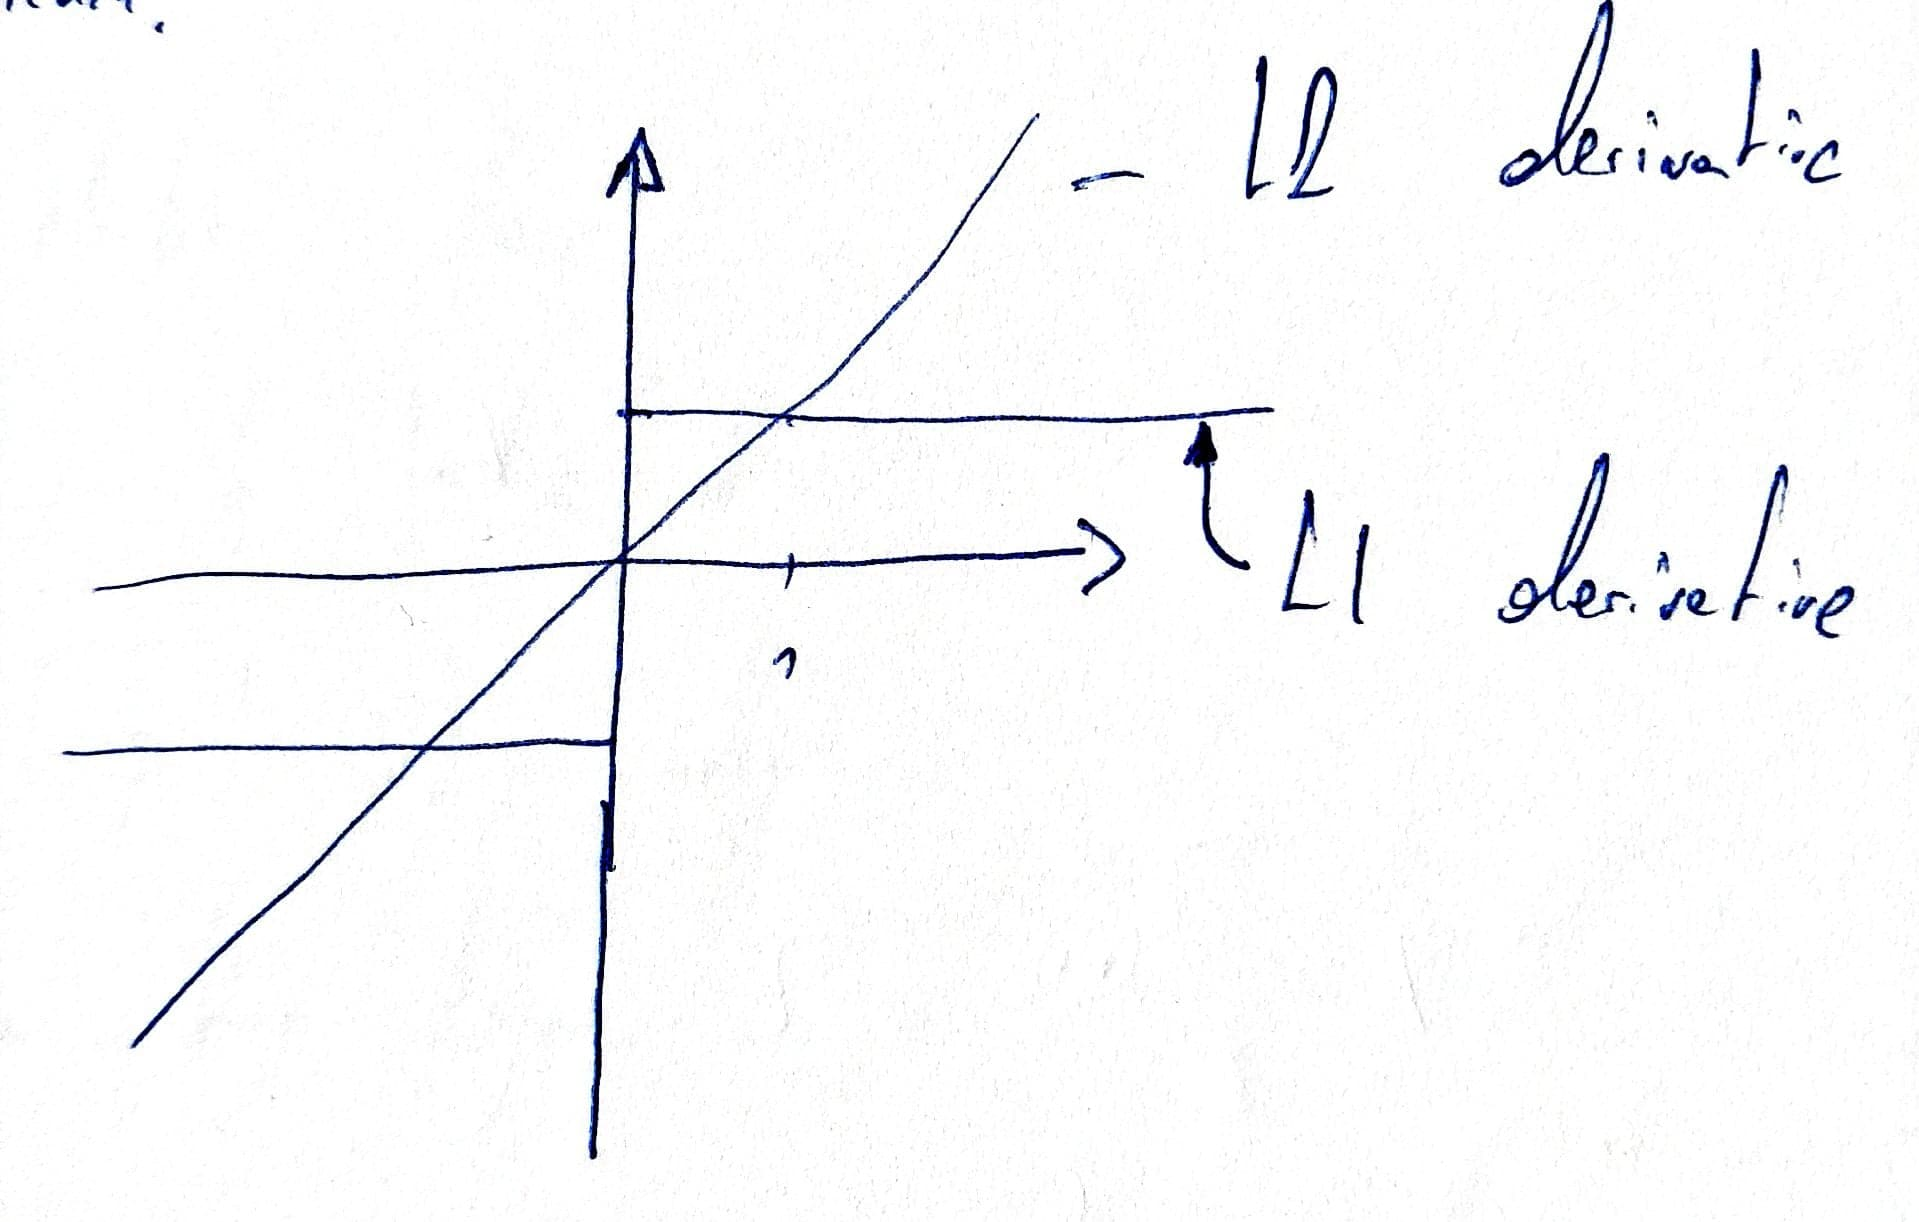
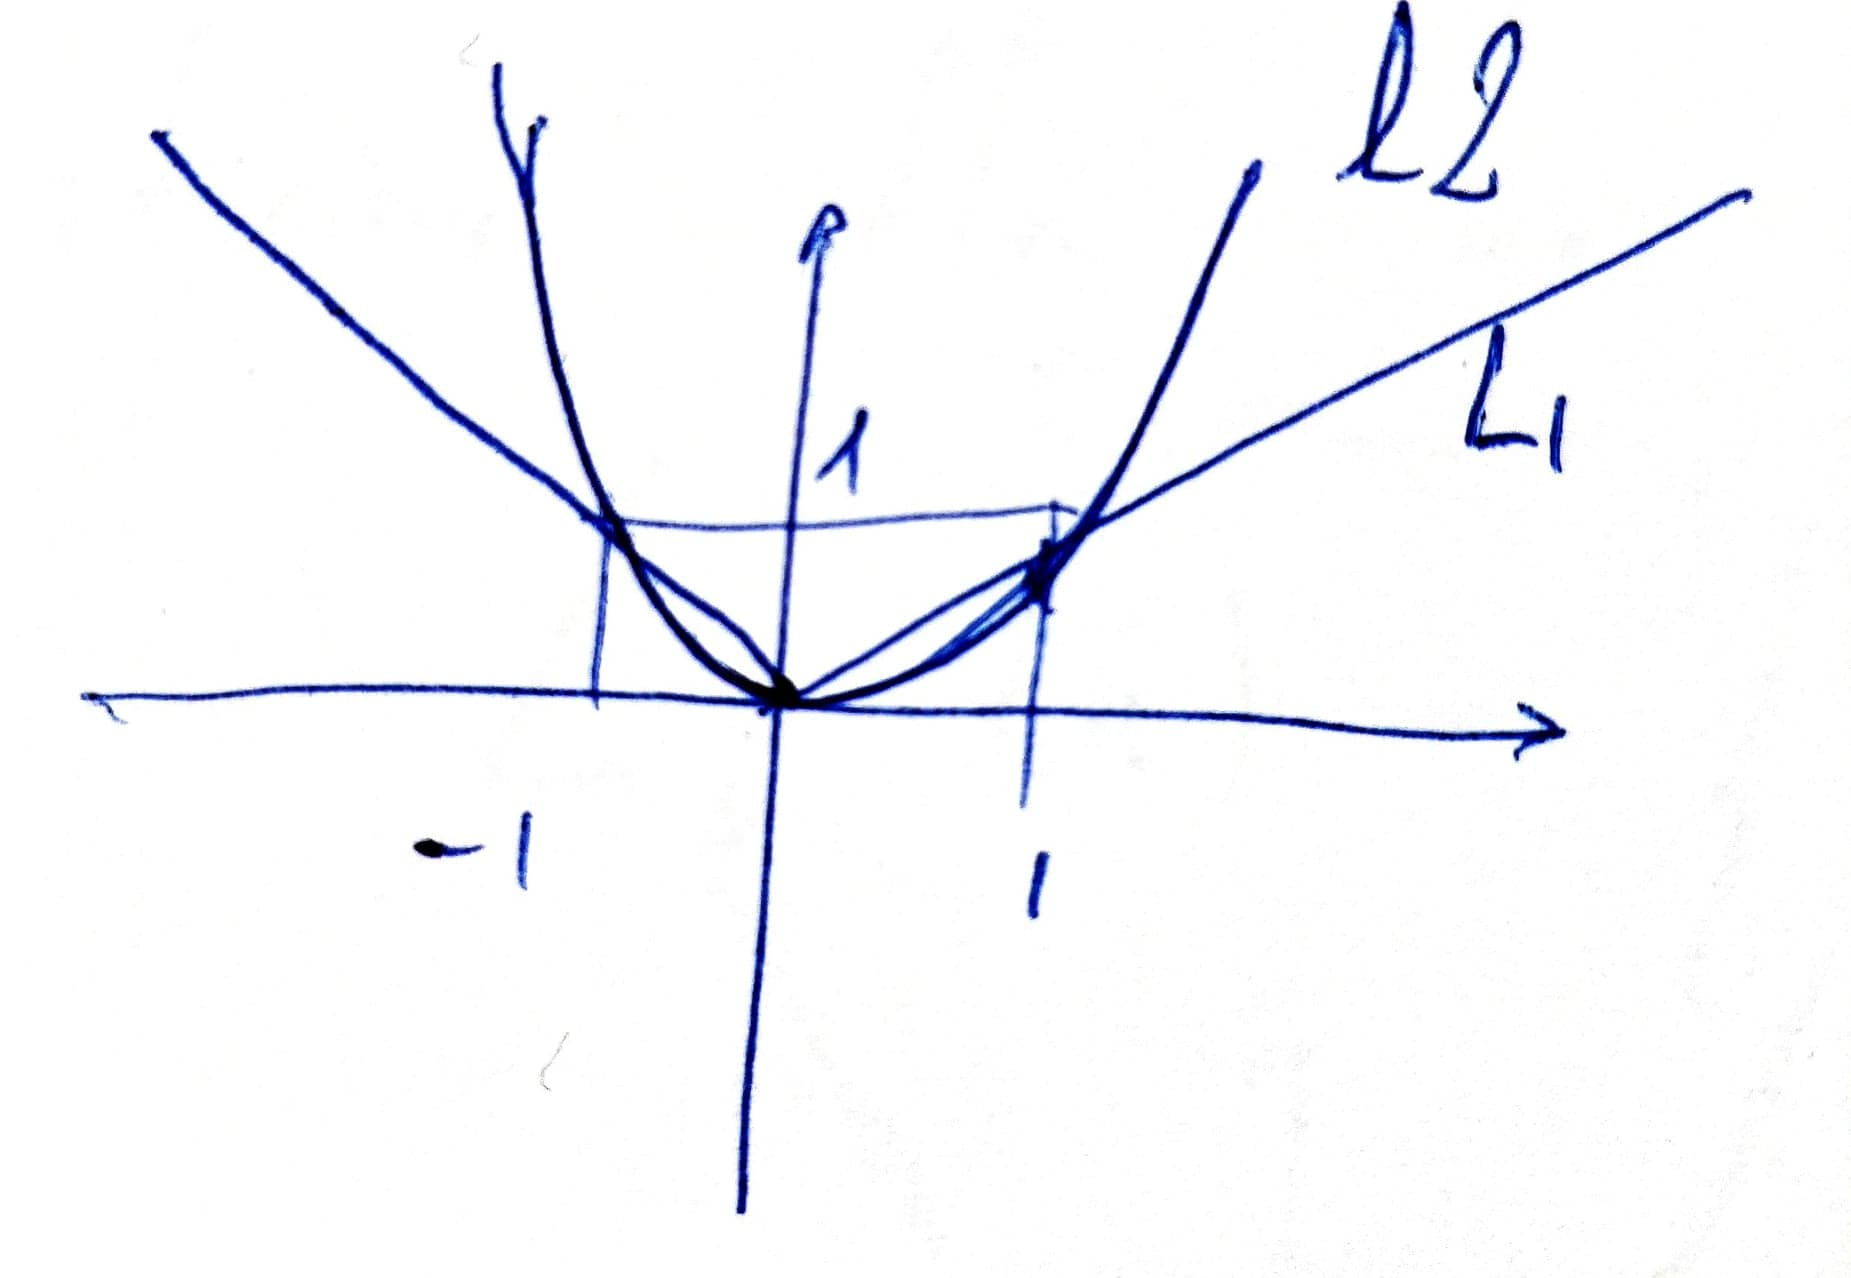
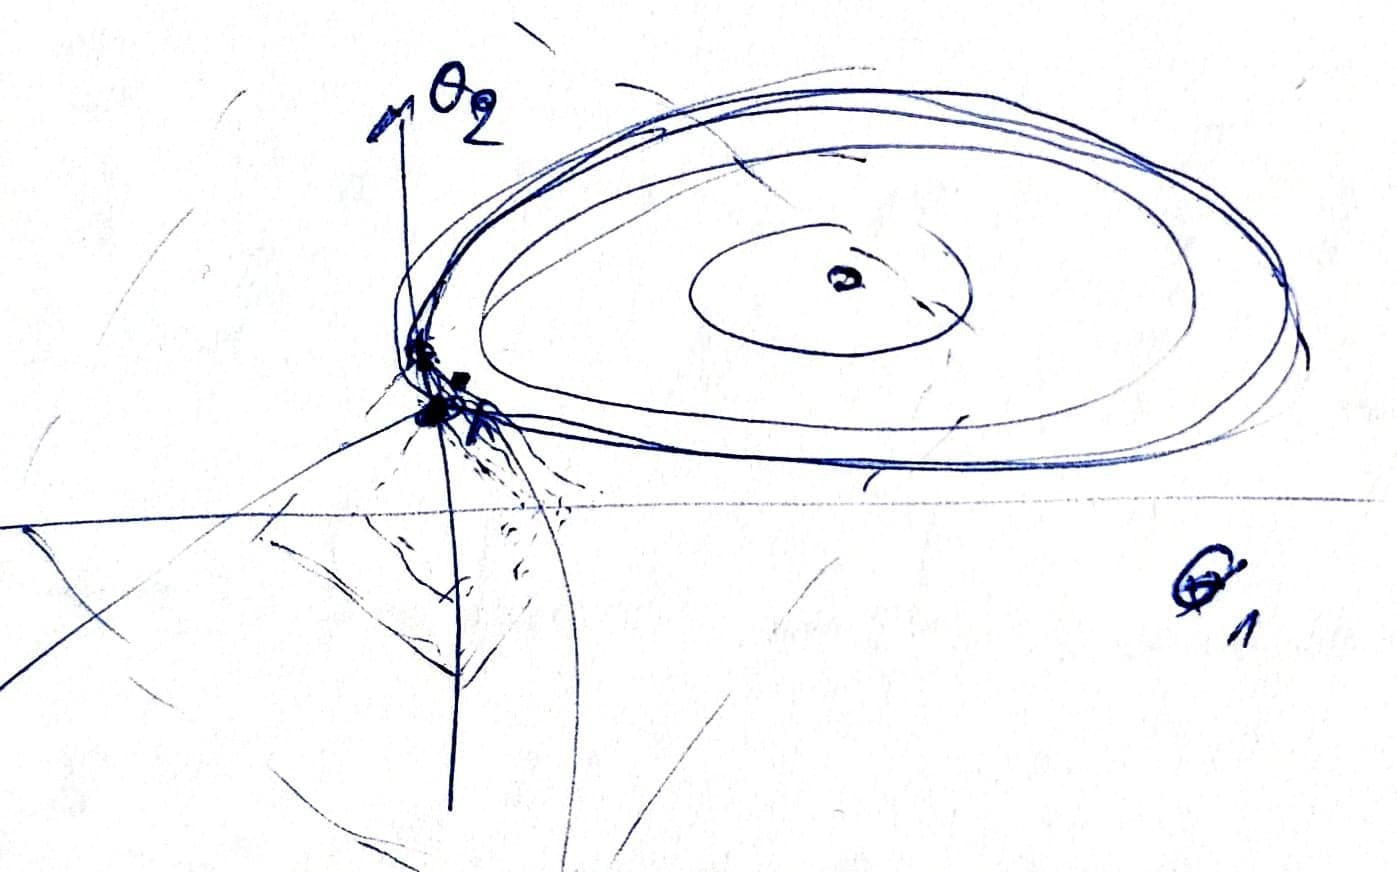
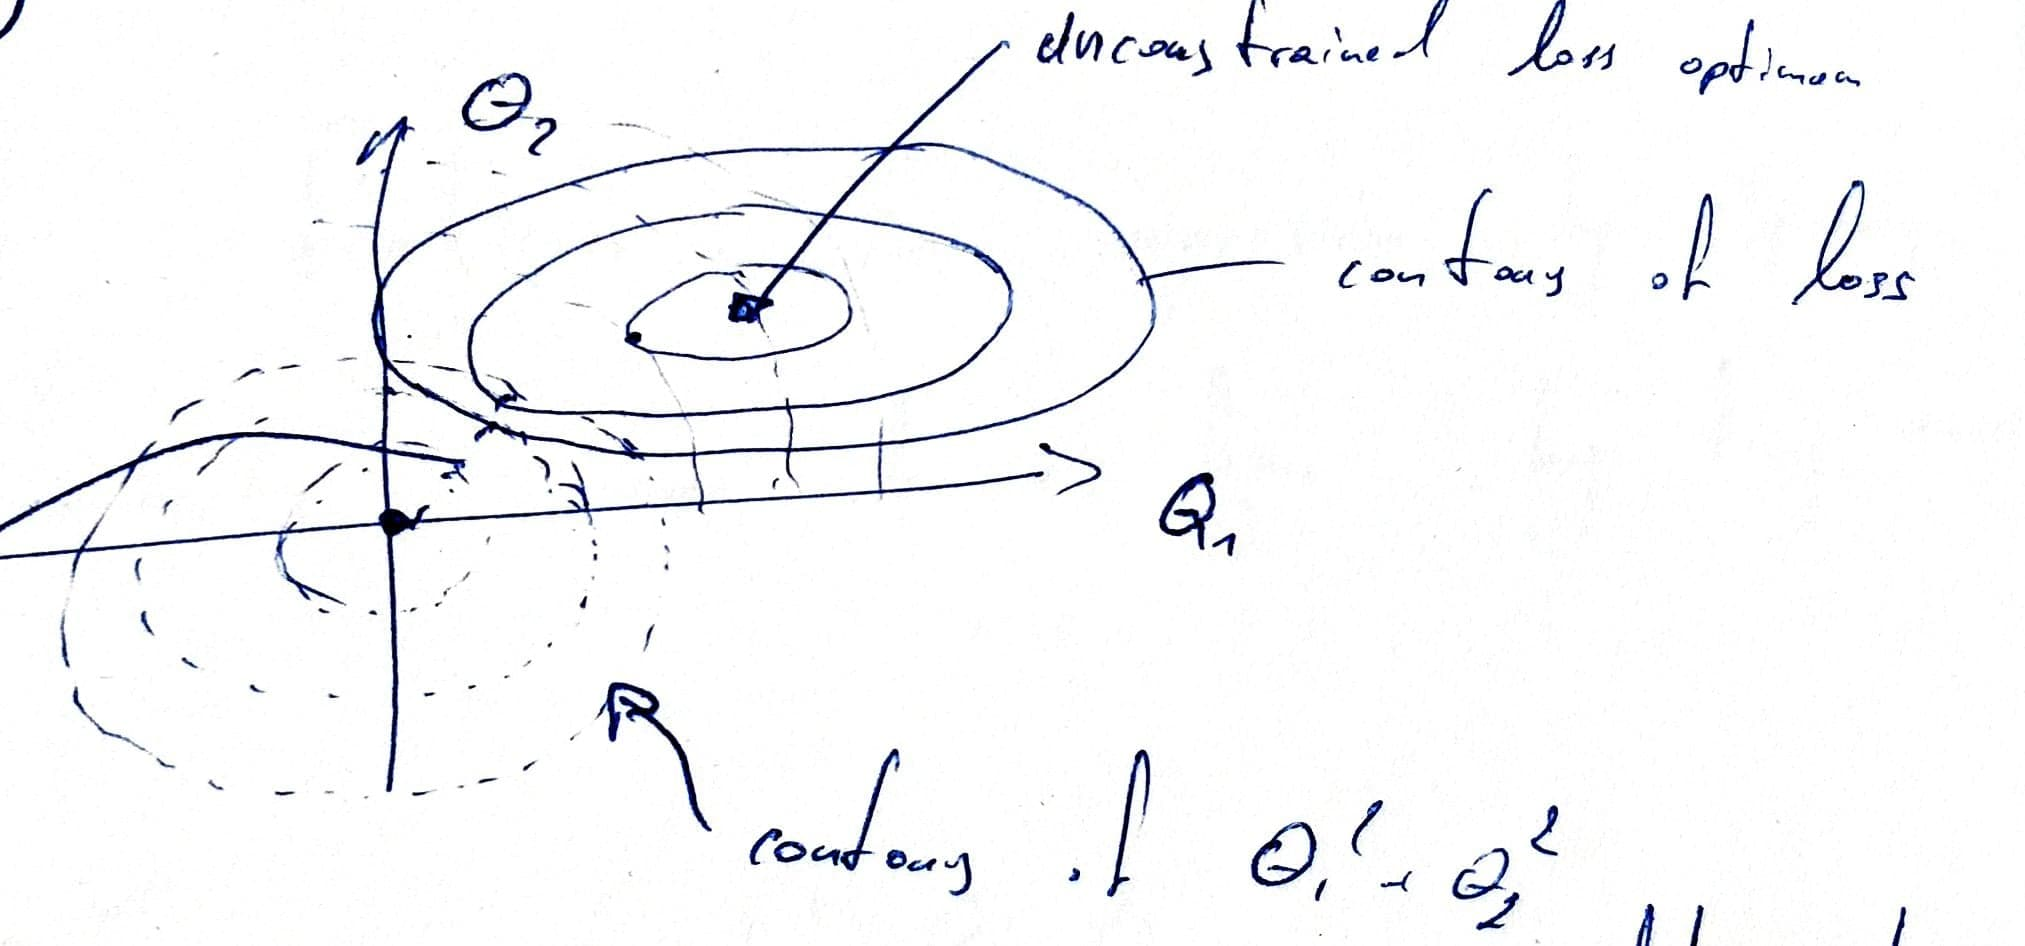
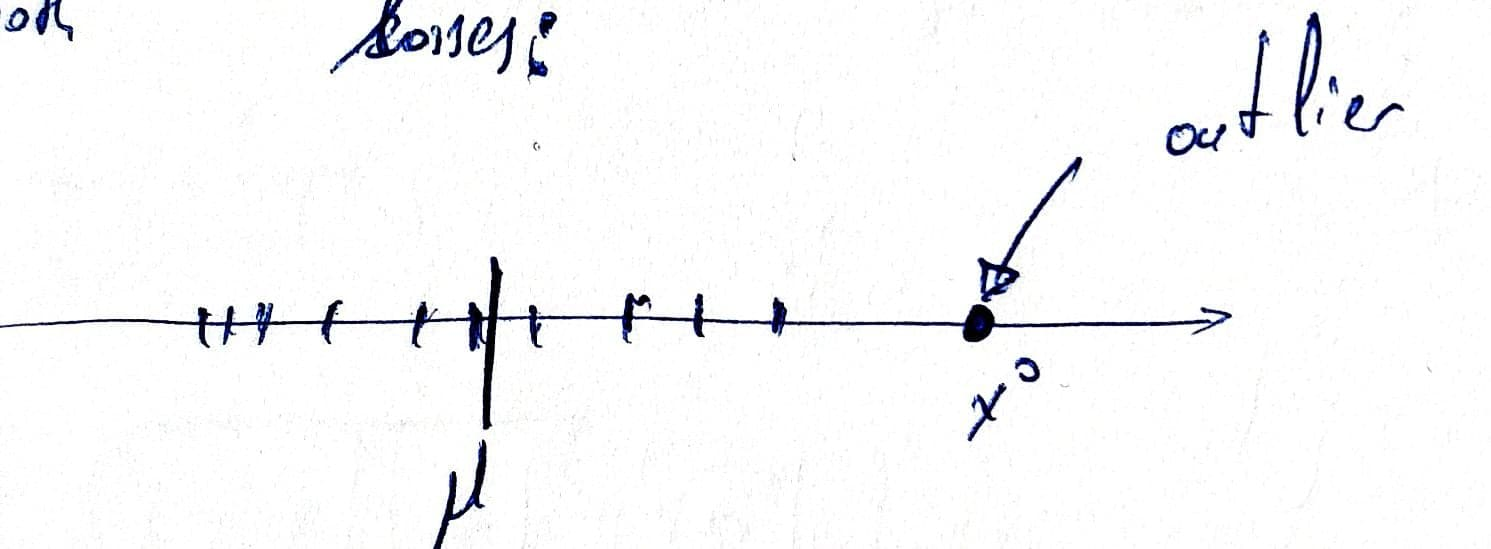
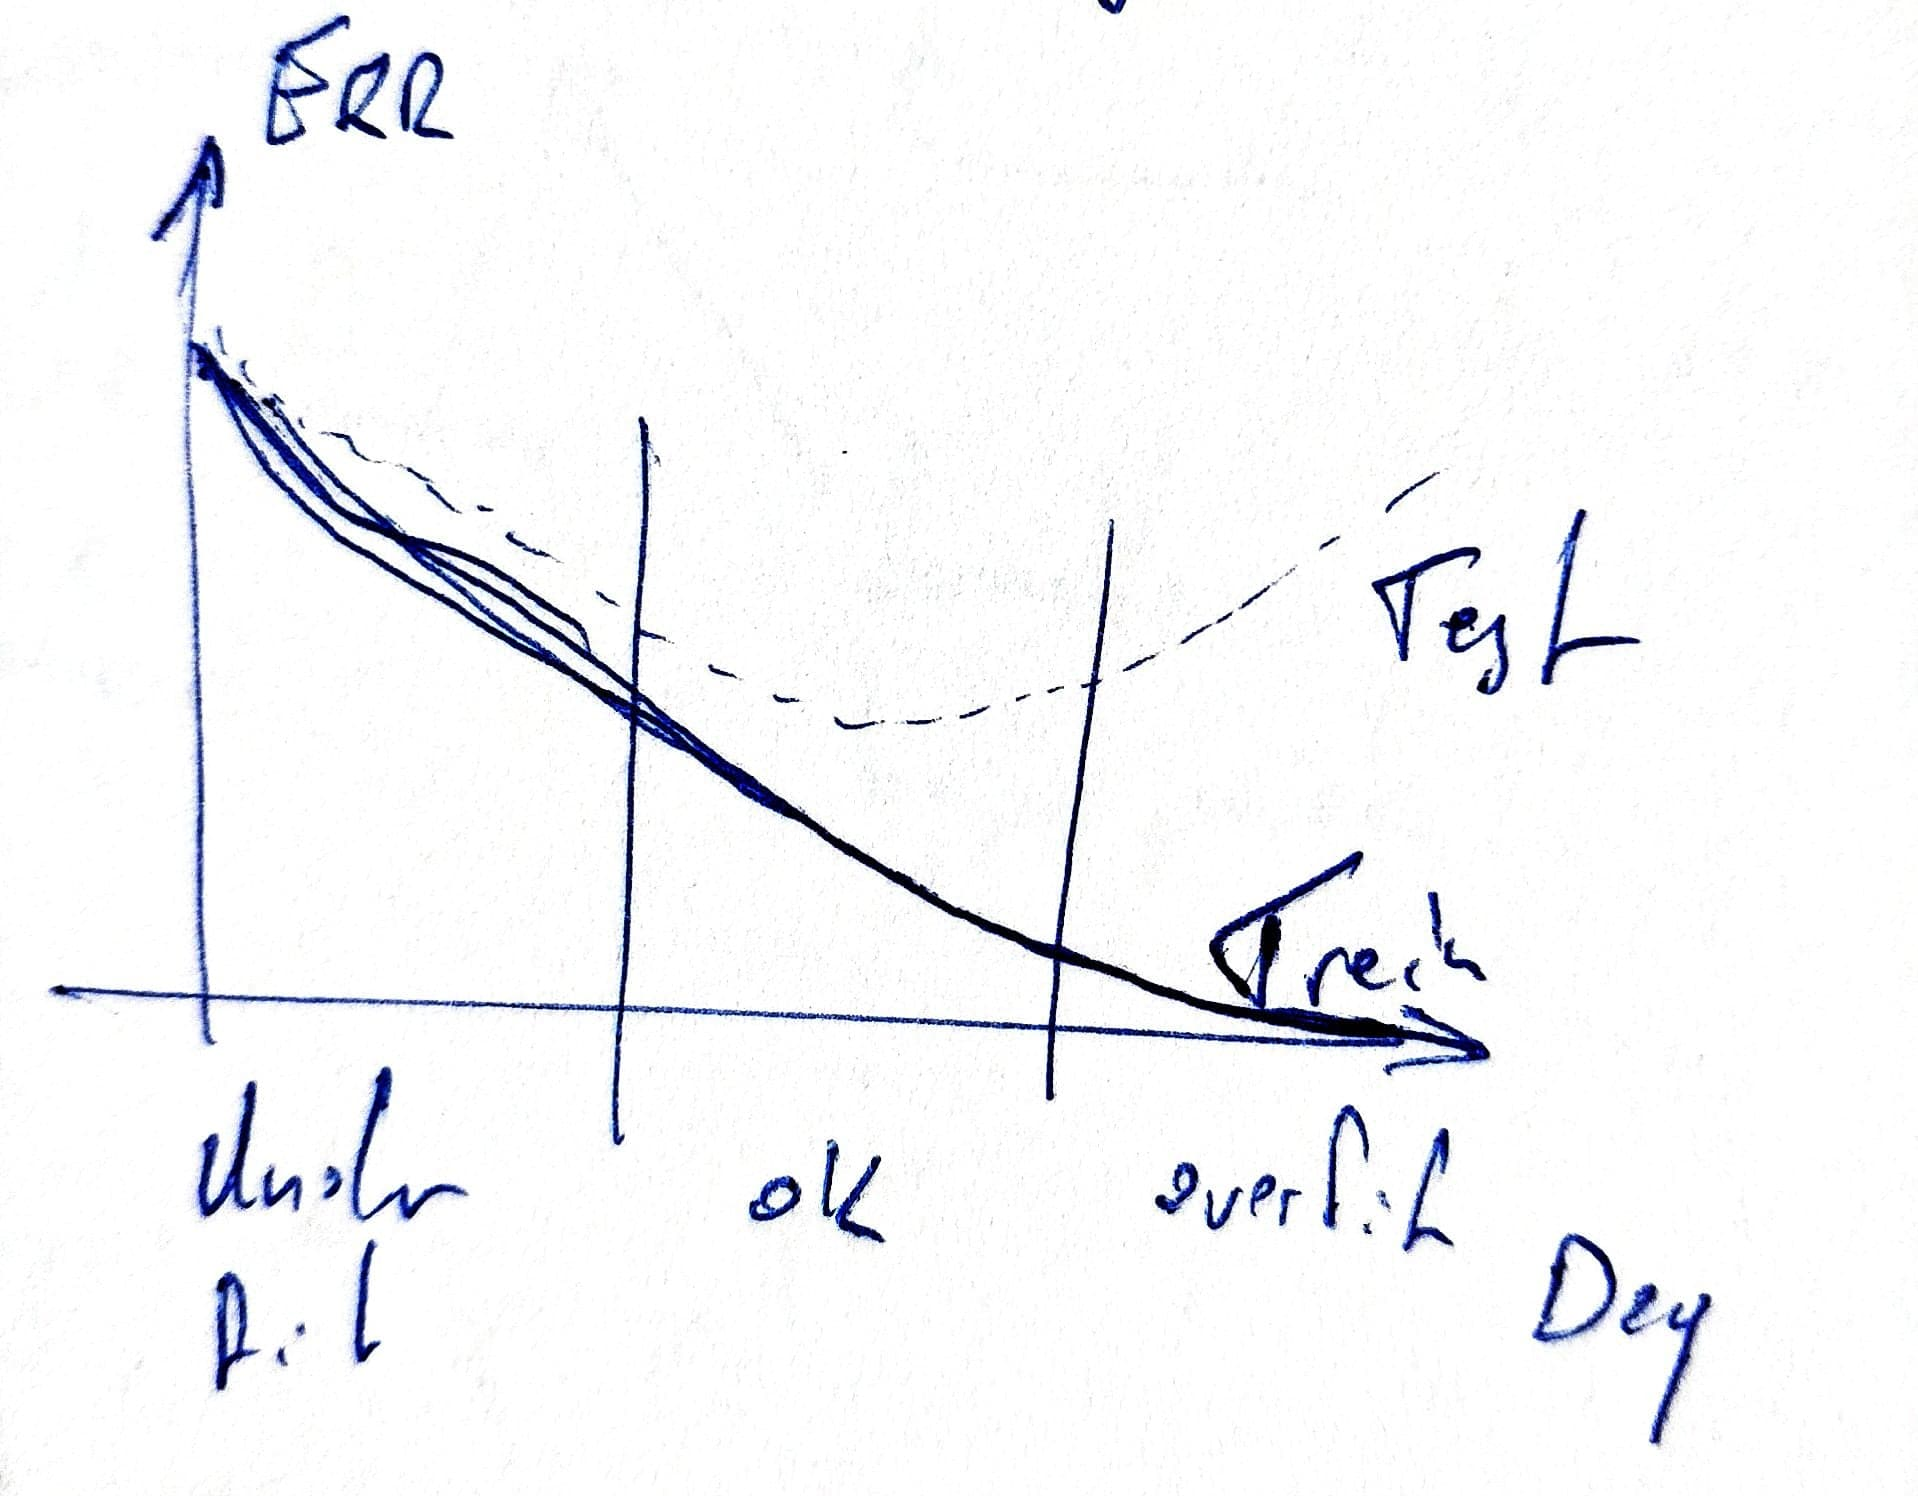
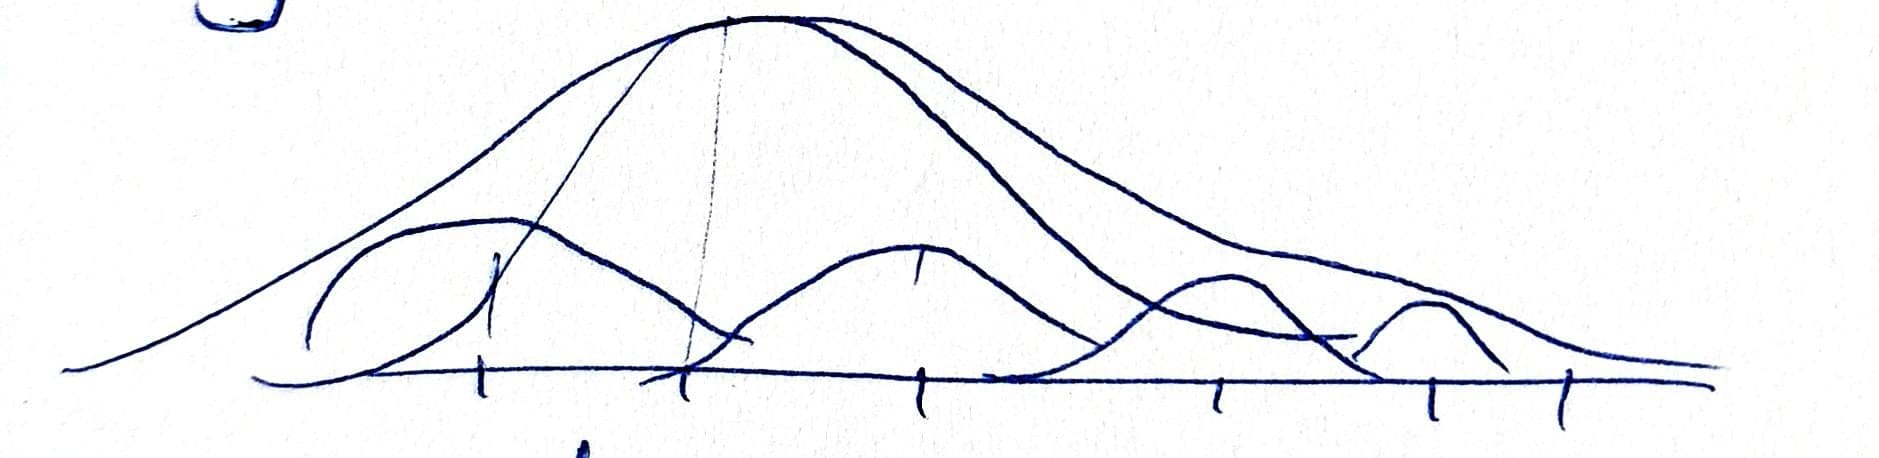